# Data exploration

## Table of contents
0. Table of contents
1. TODOs
2. Imports and loading the data 
3. Exploratory_data_analysis
4. Data cleaning
5. Training
6. Saving

## TODOs

* Prøve å konvertere null-verdier til 0, og å ha null som en egen kategori
* Teste med både OHE og annen type category encoding 

# Imports and loading the data

In [130]:
# Imports
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

print('Tensorflow version:', tf.__version__)
rcParams['figure.figsize'] = 20,10

Tensorflow version: 2.6.0


In [131]:
# Loading the data
training_data = pd.read_csv('../input/tdt05-2021-challenge-2/challenge2_train.csv', index_col=0)
X_test = pd.read_csv('../input/tdt05-2021-challenge-2/challenge2_test.csv', index_col=0)

print('Training shape:', training_data.shape)
print('Test shape:', X_test.shape)
summary_statistics = pd.DataFrame(
    {
        'dtype': training_data.dtypes,
        'categories': training_data.nunique(),
        '#nan': training_data.isnull().sum(axis = 0),
    }, 
    index=training_data.columns,
)

print(summary_statistics)
training_data.head(5)

Training shape: (50000, 30)
Test shape: (50000, 29)
          dtype  categories   #nan
target    int64           2      0
f0      float64           2   1459
f1       object         190   1487
f2       object           6   1439
f3      float64           3   1488
f4       object           2   1498
f5      float64          13  11617
f6      float64           2   1490
f7      float64           6   1525
f8       object        2177   1490
f9       object           5   1489
f10      object          26   1501
f11     float64        7633    145
f12      object         222   1541
f13      object          15   1447
f14      object        1204   1451
f15      object         222   1477
f16     float64          12   1460
f17     float64       19209   9762
f18      object           6   1556
f19     float64           6   1437
f20     float64           4   1464
f21     float64           7   1510
f22      object           3   1513
f23      object        1495   1516
f24     float64        4148   2696
f25

,target,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28
id,,,,,,,,,,,,,,,,,,,,,
0,0,1.0,gL,e,3.0,A,NaN,0.0,6.0,96ae67d3e,...,0.5,0.0,3.0,R,328b0cf4e,0.834041,T,N,1.0,14.2364
1,0,0.0,Rj,c,1.0,A,7.0,1.0,4.0,9fcf422f2,...,0.4,0.0,1.0,NaN,328b0cf4e,0.686021,T,N,1.0,NaN
2,0,NaN,In,a,1.0,A,10.0,1.0,6.0,a5adff44e,...,0.5,1.0,3.0,G,0c67fcbbd,1.141271,T,N,3.0,NaN
3,1,1.0,rA,c,3.0,A,7.0,1.0,1.0,15c90ab2e,...,0.6,1.0,1.0,G,fee4e3007,0.662382,T,N,3.0,NaN
4,0,1.0,pE,c,3.0,A,7.0,0.0,6.0,b36490559,...,0.5,0.0,1.0,B,587e040bd,-1.000000,T,N,1.0,13.9537


## Exploratory Data Analysis (EDA)

([<matplotlib.patches.Wedge at 0x7f6b7fe1c610>,
 [Text(-0.9191603833421897, 0.6042716191368241, '0'),
  Text(0.9191604116301847, -0.6042715761078207, '1')],
 [Text(-0.5013602090957398, 0.3296027013473586, '81%'),
  Text(0.5013602245255552, -0.3296026778769931, '19%')])

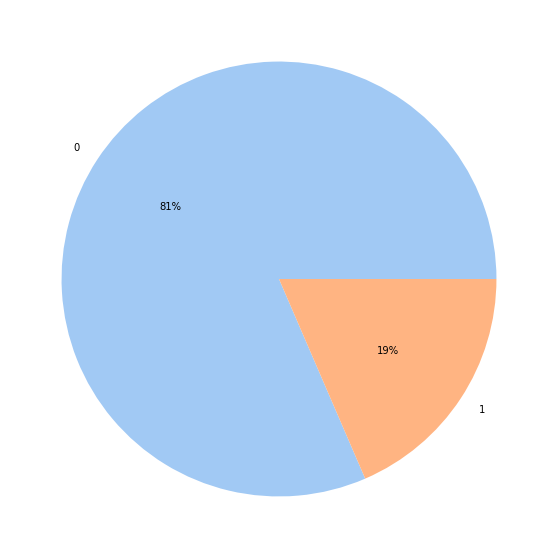

In [132]:
plt.pie(
    training_data['target'].value_counts(), 
    colors=sns.color_palette('pastel')[0:2], 
    labels=['0', '1'],
    autopct='%.0f%%',
)

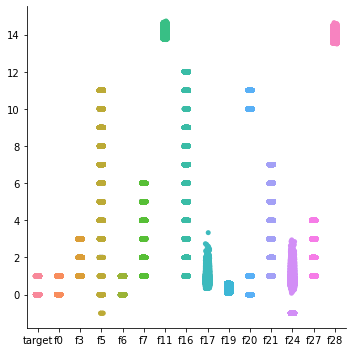

In [133]:
sns.catplot(data=training_data)

# Feature engineering

## Convert (possible) hexadecimal values to decimal

In [134]:
# Convert hexadecimal numbers to decimal
hexadecimal_features = ['f8', 'f12', 'f14', 'f15', 'f23']

func = lambda hex: int(hex, base=16)
training_data[hexadecimal_features] = training_data[hexadecimal_features].applymap(func, na_action='ignore')
X_test[hexadecimal_features] = X_test[hexadecimal_features].applymap(func, na_action='ignore')


## Convert characters to numerical

In [135]:
# Convert binary numbers to decimal
binary_to_decimal = { 
    0.0: 0, 
    1.0: 1, 
    10.0: 2, 
    11.0: 3 
}

training_data['f20'] = training_data['f20'].map(binary_to_decimal, na_action='ignore')
X_test['f20'] = X_test['f20'].map(binary_to_decimal, na_action='ignore')

In [136]:
# Convert alphabetic characters to numbers: A=1, B=2, ..., Z=26
alphabetic_features = ['f2', 'f10', 'f13', 'f18']

func = lambda c: ord(c.lower()) - 96
training_data[alphabetic_features] = training_data[alphabetic_features].applymap(func, na_action='ignore')
X_test[alphabetic_features] = X_test[alphabetic_features].applymap(func, na_action='ignore')

In [137]:
# Convert boolean features to 0.0 and 1.0
mappings = {
    'f4': {'B': 0.0, 'A': 1.0},
    'f25': {'F': 1.0, 'T': 0.0},
    'f26': {'S': 0.0, 'N': 1.0},
}

for feature, mapping in mappings.items():
    training_data[feature] = training_data[feature].map(mapping, na_action='ignore')
    X_test[feature] = X_test[feature].map(mapping, na_action='ignore')

## Correlation plot of numeric values

We are only plotting the correlation of numeric features in this instance

<AxesSubplot:>

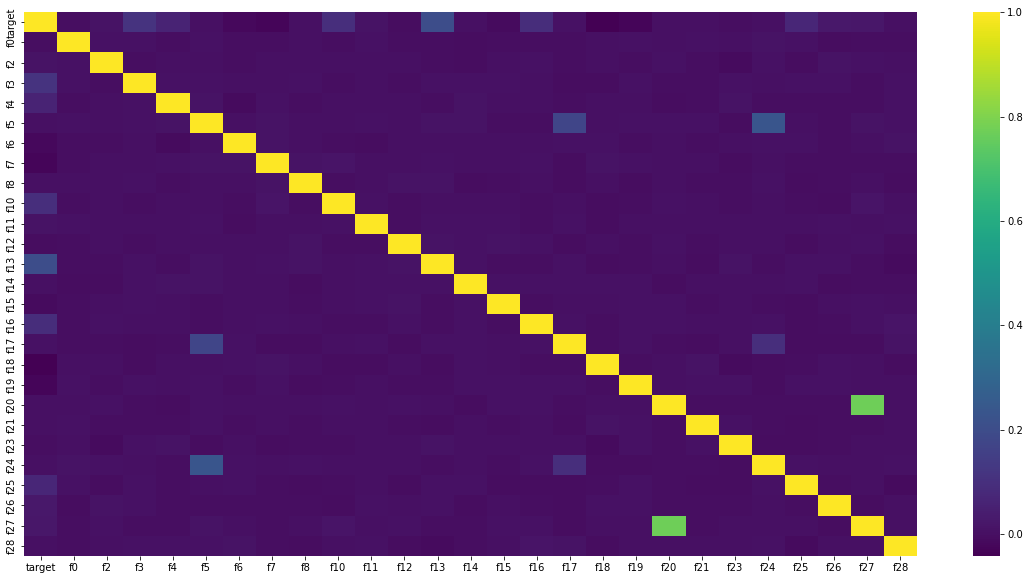

In [138]:
# Correlation plot
sns.heatmap(training_data.corr(), annot=False, cmap='viridis')

The correlation plot shows that **f20** and **f27** have a high correlation and one of these should be dropped to reduce the computational cost. We can also see that the features **f3** and **f16** have a higher correlation with the target value than others, and that we probably should somewhat focus our efforts on these.

### Feature description

| Feature | Example | Note |
| :-- | :-- | :-- |
| target | 0 or 1 | This means that the problem is a binary classification |
| f0 | 0.0 or 1.0 | Binary. Could be turned into a categorical feature |
| f1 | gL, Rj, In, ... | 173 unique two letter pairs, could be country codes or something similar |
| f2 | a, b, ..., f | letters a-f |
| f3 | 1.0, 2.0 or 3.0 | ordinal of some kind, should not be converted to categorical |
| f4 | A or B | mostly As (=88%) |
| f5 | -1, ..., 11 | weird distribution, many null values |
| f6 | 0 or 10 | Binary - could be turned into a categorical feature |
| f7 | 1, 2, ..., 6 | Ordinal of some kind, should not be converted to categorical |
| f8 | '96ae67d3e', 'a5adff44e' | Looks like hexadecimal, might be a hash of some kind |
| f9 | red, white, black, green, yellow | five colors |
| f10 | A, B, ..., Z | Could be converted to integers to get ordinal property |
| f11 | 139681, 140242, 142174 |  |
| f12 | '1c756c04a', '5d1ac7760' | Looks like hexadecimal, might be a hash of some kind |
| f13 | a, b, ..., o | Could be converted to integers to get ordinal property |
| f14 | '168e51823', '558613041' | Looks like hexadecimal, might be a hash of some kind |
| f15 | '7861df0a8', '1d88b0a79' | Looks like hexadecimal, might be a hash of some kind |
| f16 | 0, 10, ..., 120 | Ordinal of some kind, should not be converted to categorical |
| f17 | 858314945, 616742978 |  |
| f18 | A, B, ..., F | Could be converted to integers to get ordinal property |
| f19 | 0, 1, ..., 6 | Ordinal of some kind, should not be converted to categorical |
| f20 | 00, 01, 10 or 11 | Looks like a binary number. Could be converted to 0, 1, 2 and 3 |
| f21 | 0, 10, ..., 70 | Ordinal of some kind, should not be converted to categorical |
| f22 | R, G or B | Could it be a coincidence that it is RGB? |
| f23 | '328b0cf4e', '0c67fcbbd' | Looks like hexadecimal, might be a hash of some kind |
| f24 | 834041366, 686021137 |  |
| f25 | T or F | Binary - (T)rue or (F)alse |
| f26 | N or S | Binary - (N)orth or (S)outh? |
| f27 | 0, 1, ..., 4 | Ordinal of some kind, should not be converted to categorical |
| f28 | 141855, 139805 |  |


The features labeled:
- f8 
- f12 
- f14 
- f15 
- f23

All seem to be hexadecimal. These might just be an id of sorts, or they can be the hex representation of a number.  
An idea can be to covert these into decimal and see if they are important somehow.

Or check if the number of categories increases significantly when we add the test data 

In [139]:
# # Convert hexadecimal features to decimal
# radix = 16
# hexadecimal_features = ['f8', 'f12', 'f14', 'f15', 'f23']
# 
# X_transformed = training_data.copy()
# X_transformed[hexadecimal_features] = X_transformed[hexadecimal_features].fillna('-1').transform(lambda x: x.astype(str).map(lambda x: int(x, base=radix)))
# X_transformed = X_transformed.replace(-1, float('nan'))  # keep nan for later processing step

# print(X[hexadecimal_features].nunique())
# X[hexadecimal_features].hist(bins=2203, figsize=(25, 15), layout=(2, 7))

# ------------------------------------------------------------------------

# Check if the number of categories increases when we add the test data 
hexadecimal_features = ['f8', 'f12', 'f14', 'f15', 'f23']
merged_datasets = pd.concat([training_data, X_test])[hexadecimal_features]

merged_statistics = pd.DataFrame(
    {
        '#categories before merge': training_data.nunique(), 
        '#categories after merge': merged_datasets.nunique(), 
    }, 
    index=merged_datasets.columns,
)

print(merged_statistics)

     #categories before merge  #categories after merge
f8                       2177                     2203
f12                       222                      222
f14                      1204                     1211
f15                       222                      222
f23                      1495                     1514


Note: 

It is peculiar that f12 and f15 have the same amount of categories =222

What could this number represent? 


## Data cleaning
Data cleaning consists of the following steps
- Removal of unwanted observations
- Fixing structural errors
- Managing unwanted outliers
- Handeling missing data

In [140]:
# Duplicate detection
training_data.duplicated().sum(axis = 0)

0

### Outlier detection and removal

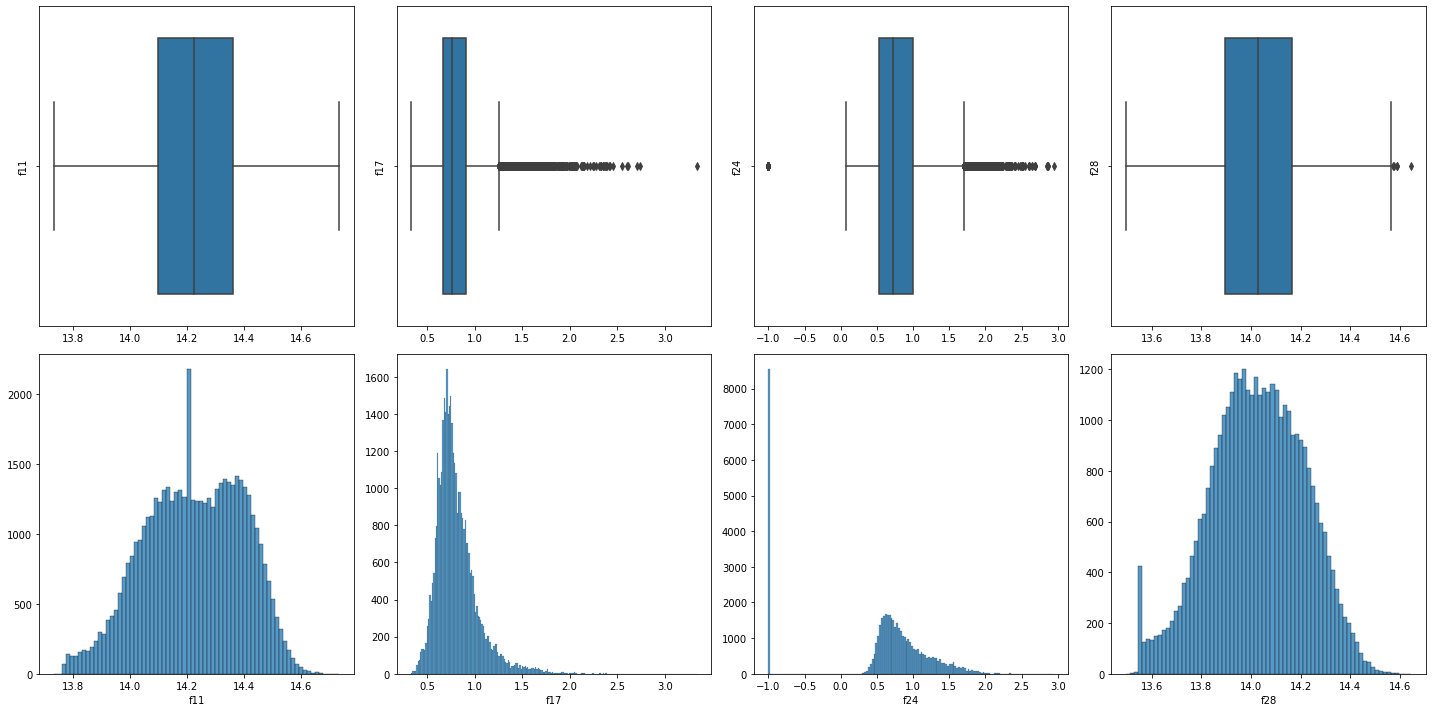

<Figure size 1440x1080 with 0 Axes>

In [141]:
# Outliers

plt.close()
# numeric features with many values:
interval_features = ['f11', 'f17', 'f24', 'f28']
fig, axes = plt.subplots(2, len(interval_features))
plt.figure(figsize=(20, 15))

for i, feature in enumerate(interval_features):
    ax = sns.boxplot(x=training_data[feature], ax=axes[0][i])
    ax.set_xlabel('')
    ax.set_ylabel(feature)

for i, feature in enumerate(interval_features):
    ax = sns.histplot(training_data[feature], ax=axes[1][i])
    ax.set_xlabel(feature)
    ax.set_ylabel('')

fig.tight_layout()
plt.show()

In [142]:
# Outlier removal by interquartile range (IQR) method

Q1 = training_data[interval_features].quantile(0.25)
Q3 = training_data[interval_features].quantile(0.75)
IQR = Q3 - Q1

# Only remove the "right tail" from the features to keep the -1 value 
training_data = training_data[~(training_data > (Q3 + 1.5 * IQR)).any(axis=1)]
training_data.shape


/tmp/ipykernel_4545/3869438494.py:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  training_data = training_data[~(training_data > (Q3 + 1.5 * IQR)).any(axis=1)]


(47297, 30)

### Dealing with missing values
XBoost and CatBoost handles missing data differently. This needs to be taken into account before training.
- XGBoost: missing values should be zero
- CatBoost: missing values should be way off the distribution, like -999

In [143]:
# Impute missing values

# fill_value = 0  # Used for XGBoost
fill_value = -999  # Used for CatBoost

training_data.fillna(fill_value, inplace=True)
X_test.fillna(fill_value, inplace=True)

missing_values = pd.DataFrame(
    {
        '#nan_train': training_data.isnull().sum(axis = 0),
        '#nan_test': training_data.isnull().sum(axis = 0),
    }, 
    index=training_data.columns,
)

# Check if there are any missing values left
print(missing_values)

        #nan_train  #nan_test
target           0          0
f0               0          0
f1               0          0
f2               0          0
f3               0          0
f4               0          0
f5               0          0
f6               0          0
f7               0          0
f8               0          0
f9               0          0
f10              0          0
f11              0          0
f12              0          0
f13              0          0
f14              0          0
f15              0          0
f16              0          0
f17              0          0
f18              0          0
f19              0          0
f20              0          0
f21              0          0
f22              0          0
f23              0          0
f24              0          0
f25              0          0
f26              0          0
f27              0          0
f28              0          0


/home/nicklas/repos/artificial-intelligence/tdt05/venv/lib/python3.8/site-packages/pandas/core/frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [144]:
# Partition the data
X = training_data.drop(columns=['target']).copy()
y = training_data[['target']].copy()

## CatBoost

In [145]:
# # CatBoost specific preprocessing
# categorical_numerical_features = [0, 1, 2, 4, 6, 8, 9, 10, 12, 13, 14, 15, 18, 20, 22, 23, 25, 26]
# X[categorical_numerical_features] = X[categorical_numerical_features].astype(str)
# X_test[categorical_numerical_features] = X_test[categorical_numerical_features].astype(str)

# # f0, f5, f27 have low feature importance and can be dropped for more generality
# #X.drop(["f6", "f7", "f12", "f19", "f15"], axis=1, inplace=True)
# #X_test.drop(["f6", "f7", "f12", "f19", "f15"], axis=1, inplace=True)

In [146]:
# Utility function for computing the new indices after dropping certain columns
def indices_after_droping(indices, dropped_columns):
    updated_indices = list(indices)
    dropped_indices = [int(column.replace('f', '')) for column in dropped_columns]
    
    for i, old_index in enumerate(indices):
        for column_index in dropped_indices:
            if old_index >= column_index:
                updated_indices[i] -= 1

    return updated_indices

In [147]:
from catboost import CatBoostClassifier, Pool, metrics, cv
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

categorical_features_indices = [1, 9, 22]  

X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.75, random_state=42)

model = CatBoostClassifier(
    custom_loss=[metrics.Accuracy()],
    random_seed=42,
    logging_level='Silent'
)

model.fit(
    X, y,
    cat_features=categorical_features_indices,
    # eval_set=(X_validation, y_validation),
    # plot=True
)

# cv_params = model.get_params()
# cv_params.update({
#     'loss_function': metrics.Logloss()
# })

# cv_data = cv(
#     Pool(X, y, cat_features=categorical_features_indices),
#     cv_params,
#     plot=True
# )

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

{'Accuracy': 0.8478339006702328, 'Logloss': 0.34787289815981676}


<AxesSubplot:xlabel='feature_importance'>

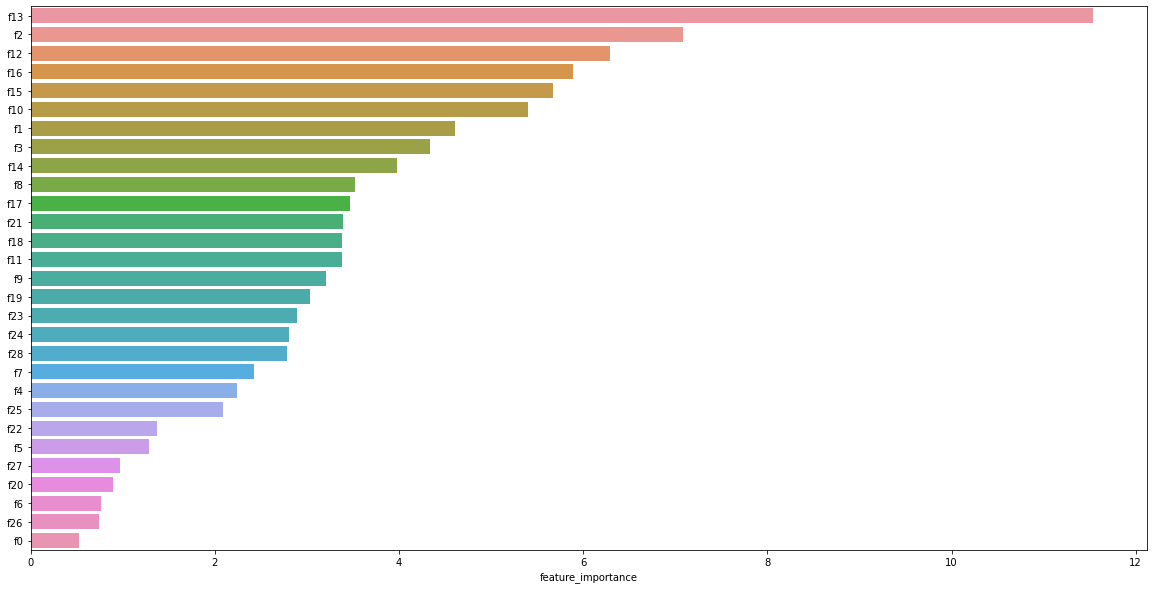

In [148]:
print(model.get_best_score()['learn'])
feature_importance = pd.DataFrame({'feature_importance': model.get_feature_importance()}, index=X.columns)
feature_importance.sort_values(by='feature_importance', ascending=False, inplace=True)
sns.barplot(data=feature_importance, x='feature_importance', y=feature_importance.index)

## Make predictions

Make predictions from `X_test` and save to file.

In [149]:
y_pred = model.predict(X_test, prediction_type='Probability')
predictions = pd.DataFrame({'id': X_test.index, 'target': y_pred[:,1]})

predictions.to_csv('./prediction_2.txt', index=False)

## One-hot encoding
The features labeled:
- f0 (Boolean)
- f1
- f2
- f4
- f9
- f10
- f13
- f18
- f22
- f25 (Boolean)
- f26 (Boolean)

Toghether with the hex features discussed above:
- f8 
- f12 
- f14 
- f15 
- f23


All seem to be categorical and should therefore be converted to one-hot encoding (depending on the learning algorithm).

In [150]:
# One-hot encode categorical features
categorical_features = ['f0', 'f1', 'f2', 'f4', 'f8', 'f9', 'f10', 'f12', 'f13', 'f14', 'f15', 'f18', 'f22', 'f23', 'f25', 'f26']

X_encoded = pd.get_dummies(X, columns=categorical_features)
X_encoded.head()

,f3,f5,f6,f7,f11,f16,f17,f19,f20,f21,...,f23_68566024808.0,f23_68599095642.0,f23_68693218498.0,f23_68703136399.0,f25_-999.0,f25_0.0,f25_1.0,f26_-999.0,f26_0.0,f26_1.0
id,,,,,,,,,,,,,,,,,,,,,
0,3.0,-999.0,0.0,6.0,13.9681,2.0,0.858315,0.5,0.0,3.0,...,0,0,0,0,0,1,0,0,0,1
1,1.0,7.0,1.0,4.0,14.0242,-999.0,0.616743,0.4,0.0,1.0,...,0,0,0,0,0,1,0,0,0,1
2,1.0,10.0,1.0,6.0,14.2174,3.0,0.711389,0.5,1.0,3.0,...,0,0,0,0,0,1,0,0,0,1
3,3.0,7.0,1.0,1.0,13.8536,5.0,-999.000000,0.6,1.0,1.0,...,0,0,0,0,0,1,0,0,0,1
4,3.0,7.0,0.0,6.0,14.2347,2.0,0.572781,0.5,0.0,1.0,...,0,0,0,0,0,1,0,0,0,1


In [151]:
# plt.figure(figsize=(32, 12))
# sns.heatmap(training_data.corr(), annot=True, cmap='viridis')